In [269]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [270]:
import os
os.getcwd()


'C:\\Users\\fkari653'

In [271]:
df=pd.read_csv('mall customers.csv')

In [272]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [273]:
df=df.drop('CustomerID',axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [274]:
df=df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'score'})

In [275]:
df.describe()

,Age,Income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


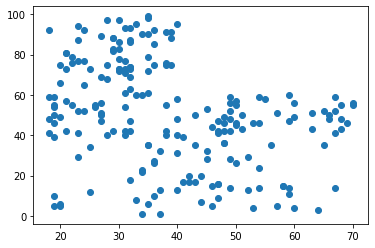

In [277]:
# Data Visualization
plt.scatter(df.Age,df.score)

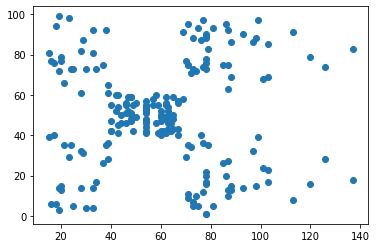

In [278]:
plt.scatter(df.Income,df.score)

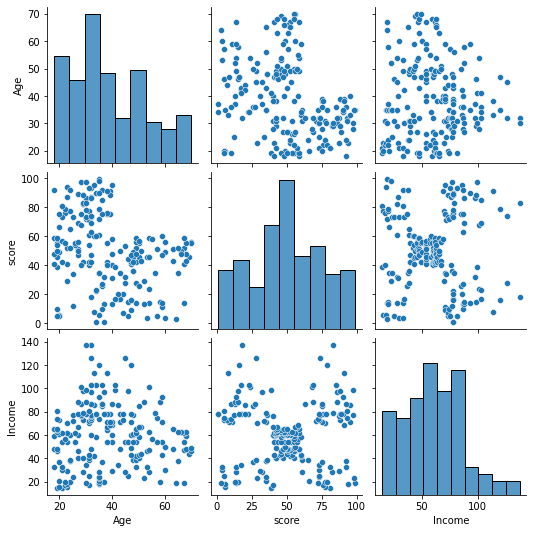

In [279]:
# Pairplot
sns.pairplot(df[['Age','score','Income']])

In [280]:
# KMEANS 

In [281]:
import sklearn.cluster as cluster
kmeans=cluster.KMeans()

In [282]:
kmeans.fit(df[['Income','score']])

KMeans()

In [283]:
pred=kmeans.predict(df[['Income','score']])

In [284]:
df['clusters_num']=pred

In [285]:
df.head()

,Gender,Age,Income,score,clusters_num
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3


In [286]:
df.tail()

,Gender,Age,Income,score,clusters_num
195,Female,35,120,79,2
196,Female,45,126,28,4
197,Male,32,126,74,2
198,Male,32,137,18,4
199,Male,30,137,83,2


In [287]:
df.clusters_num.value_counts()

7    44
0    42
5    28
3    22
6    22
1    21
2    11
4    10
Name: clusters_num, dtype: int64

In [288]:
centroids=kmeans.cluster_centers_

In [289]:
centroids

array([[ 63.95238095,  46.21428571],
       [ 25.0952381 ,  80.04761905],
       [108.18181818,  82.72727273],
       [ 25.72727273,  20.22727273],
       [109.7       ,  22.        ],
       [ 78.03571429,  81.89285714],
       [ 80.18181818,  12.68181818],
       [ 47.65909091,  51.61363636]])

In [290]:
kmeans.predict([[120,80]])

array([2])

In [303]:
# DATA VISULIZATION

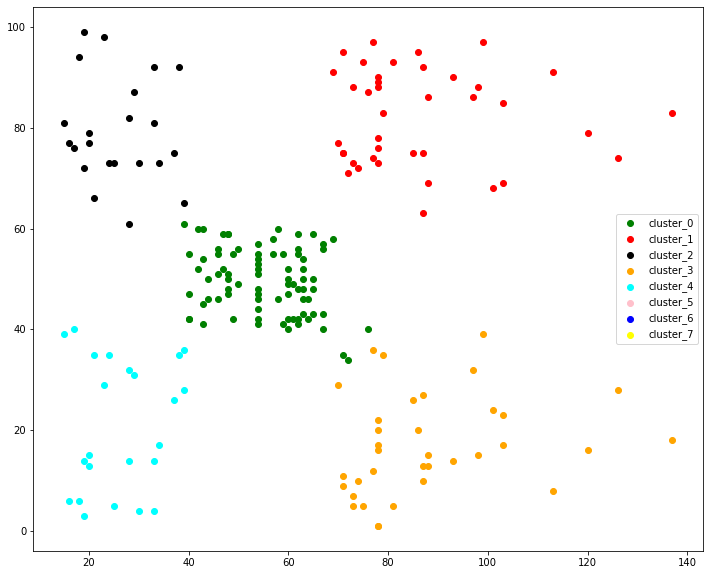

In [305]:
cl0=df[df.clusters_num==0]
cl1=df[df.clusters_num==1]
cl2=df[df.clusters_num==2]
cl3=df[df.clusters_num==3]
cl4=df[df.clusters_num==4]
cl5=df[df.clusters_num==5]
cl6=df[df.clusters_num==6]
cl7=df[df.clusters_num==7]

plt.figure(figsize=(12,10))


plt.scatter(cl0['Income'],cl0['score'],color='green',label='cluster_0')
plt.scatter(cl1['Income'],cl1['score'],color='red',label='cluster_1')
plt.scatter(cl2['Income'],cl2['score'],color='black',label='cluster_2')
plt.scatter(cl3['Income'],cl3['score'],color='orange',label='cluster_3')
plt.scatter(cl4['Income'],cl4['score'],color='cyan',label='cluster_4')
plt.scatter(cl5['Income'],cl5['score'],color='pink',label='cluster_5')
plt.scatter(cl6['Income'],cl6['score'],color='blue',label='cluster_6')
plt.scatter(cl7['Income'],cl7['score'],color='yellow',label='cluster_7')
plt.legend()


# Tuning For KMeans

In [306]:
from sklearn.cluster import KMeans


In [307]:
# Calculate Elbow Method
wcss=[]

clusters=range(1,15)

for k in clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['Income','score']])
    wcss.append(kmeans.inertia_)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [308]:
wcss


[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25004.83031471278,
 21862.09267218289,
 19641.456216651564,
 17595.28888108518,
 16056.615737203974,
 14293.143054331289,
 12775.343451156687]

Text(0.5, 1.0, 'Elbow Method')

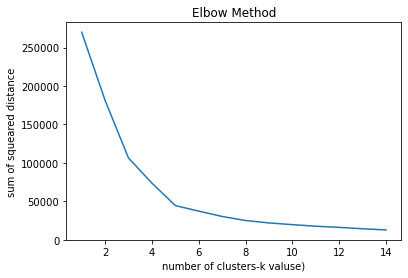

In [309]:
plt.plot(clusters,wcss)
plt.xlabel('number of clusters-k valuse)')
plt.ylabel('sum of squeared distance')
plt.title('Elbow Method')

In [310]:
# After Tuning
kmeans=cluster.KMeans(n_clusters=5)
pred=kmeans.fit_predict(df[['Income','score']])
pred

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [311]:
df['clusters_num']=pred

In [312]:
df.head()

,Gender,Age,Income,score,clusters_num
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


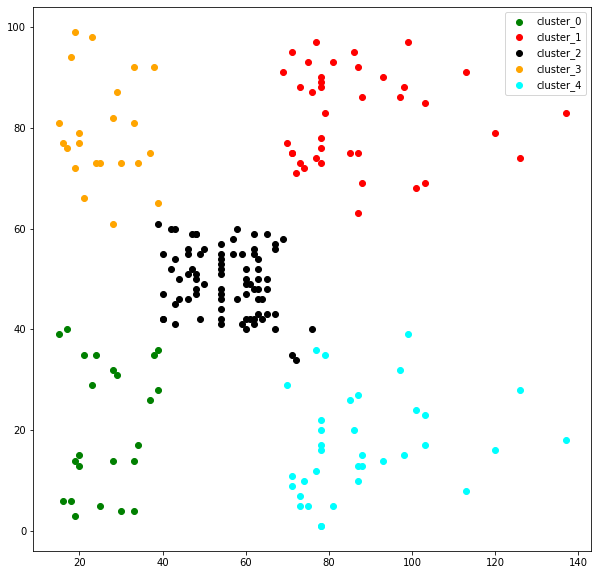

In [313]:
cl0=df[df.clusters_num==0]
cl1=df[df.clusters_num==1]
cl2=df[df.clusters_num==2]
cl3=df[df.clusters_num==3]
cl4=df[df.clusters_num==4]

plt.figure(figsize=(10,10))


plt.scatter(cl0['Income'],cl0['score'],color='green',label='cluster_0')
plt.scatter(cl1['Income'],cl1['score'],color='red',label='cluster_1')
plt.scatter(cl2['Income'],cl2['score'],color='black',label='cluster_2')
plt.scatter(cl3['Income'],cl3['score'],color='orange',label='cluster_3')
plt.scatter(cl4['Income'],cl4['score'],color='cyan',label='cluster_4')

plt.legend()

In [316]:
# to see the center
center=kmeans.cluster_centers_
center

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

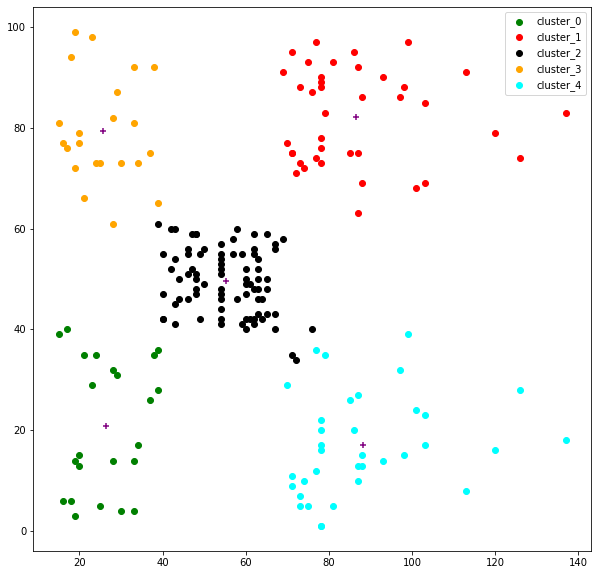

In [319]:
cl0=df[df.clusters_num==0]
cl1=df[df.clusters_num==1]
cl2=df[df.clusters_num==2]
cl3=df[df.clusters_num==3]
cl4=df[df.clusters_num==4]

plt.figure(figsize=(10,10))


plt.scatter(cl0['Income'],cl0['score'],color='green',label='cluster_0')
plt.scatter(cl1['Income'],cl1['score'],color='red',label='cluster_1')
plt.scatter(cl2['Income'],cl2['score'],color='black',label='cluster_2')
plt.scatter(cl3['Income'],cl3['score'],color='orange',label='cluster_3')
plt.scatter(cl4['Income'],cl4['score'],color='cyan',label='cluster_4')

plt.scatter(center[:,0],center[:,1],color='purple',marker='+')


plt.legend()

In [323]:
!pip install kneed

In [334]:
# TO GET for more exact cluster
from kneed import KneeLocator
kneedle=KneeLocator(clusters,wcss,curve='convex',direction='decreasing')
kneedle

In [335]:
print('optimal number of clusters=',kneedle.knee)

optimal number of clusters= 5
